In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from torch_geometric.nn import Sequential, GCNConv
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('training_data_eigen.csv')

In [3]:
data.head()

,tch,mch,tox,ub,vg,e0,e1,e2
0,2.000000e-09,0.02,1.000000e-09,3.0,-1.0,1.538,4.7403,5.126
1,2.000000e-09,0.02,1.000000e-09,3.0,-0.9,1.438,4.6403,5.026
2,2.000000e-09,0.02,1.000000e-09,3.0,-0.8,1.338,4.5403,4.926
3,2.000000e-09,0.02,1.000000e-09,3.0,-0.7,1.238,4.4403,4.826
4,2.000000e-09,0.02,1.000000e-09,3.0,-0.6,1.138,4.3403,4.726


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tch     7380 non-null   float64
 1   mch     7380 non-null   float64
 2   tox     7380 non-null   float64
 3   ub      7380 non-null   float64
 4   vg      7380 non-null   float64
 5   e0      7380 non-null   float64
 6   e1      7380 non-null   float64
 7   e2      7380 non-null   float64
dtypes: float64(8)
memory usage: 461.4 KB


In [5]:
data.columns

Index(['tch', 'mch', 'tox', 'ub', 'vg', 'e0', 'e1', 'e2'], dtype='object')

In [6]:
data.describe()

,tch,mch,tox,ub,vg,e0,e1,e2
count,7.380000e+03,7380.000000,7.380000e+03,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000
mean,6.000000e-09,0.050000,2.000000e-09,3.500000,1.000000,-0.224253,0.539095,1.373837
std,2.828619e-09,0.022362,8.165519e-10,0.408276,1.183296,0.693102,1.107441,1.371258
min,2.000000e-09,0.020000,1.000000e-09,3.000000,-1.000000,-2.063600,-1.517100,-0.903470
25%,4.000000e-09,0.035000,1.000000e-09,3.000000,0.000000,-0.681745,-0.265975,0.256095
50%,6.000000e-09,0.050000,2.000000e-09,3.500000,1.000000,-0.322910,0.228025,1.068900
75%,8.000000e-09,0.065000,3.000000e-09,4.000000,2.000000,0.224240,1.143900,2.182075
max,1.000000e-08,0.080000,3.000000e-09,4.000000,3.000000,1.624200,5.477800,6.110300


In [7]:
data.isnull().sum()

tch    0
mch    0
tox    0
ub     0
vg     0
e0     0
e1     0
e2     0
dtype: int64

In [13]:
vg=np.ravel(data["vg"])/10
tch=np.ravel(data["tch"])/1e-9/10
tox=np.ravel(data["tox"])/1e-9/10
mch=np.ravel(data["mch"])/0.1
ub=np.ravel(data["ub"])/10
print(data)
X1=np.array([tch,mch,tox,ub,vg])
df0 = pd.DataFrame(data=X1.T,columns=["tch", "mch","tox","ub","vg"]) 
X=df0.iloc[:,0:5]
print(X)
y=data.iloc[:,5:8]
y=y/10
print(y)

               tch   mch           tox   ub   vg       e0       e1       e2
0     2.000000e-09  0.02  1.000000e-09  3.0 -1.0  1.53800  4.74030  5.12600
1     2.000000e-09  0.02  1.000000e-09  3.0 -0.9  1.43800  4.64030  5.02600
2     2.000000e-09  0.02  1.000000e-09  3.0 -0.8  1.33800  4.54030  4.92600
3     2.000000e-09  0.02  1.000000e-09  3.0 -0.7  1.23800  4.44030  4.82600
4     2.000000e-09  0.02  1.000000e-09  3.0 -0.6  1.13800  4.34030  4.72600
...            ...   ...           ...  ...  ...      ...      ...      ...
7375  1.000000e-08  0.08  3.000000e-09  4.0  2.6 -0.36603 -0.31503 -0.11621
7376  1.000000e-08  0.08  3.000000e-09  4.0  2.7 -0.37648 -0.32722 -0.12711
7377  1.000000e-08  0.08  3.000000e-09  4.0  2.8 -0.38699 -0.33942 -0.13793
7378  1.000000e-08  0.08  3.000000e-09  4.0  2.9 -0.39754 -0.35161 -0.14869
7379  1.000000e-08  0.08  3.000000e-09  4.0  3.0 -0.40812 -0.36380 -0.15937

[7380 rows x 8 columns]
      tch  mch  tox   ub    vg
0     0.2  0.2  0.1  0.3 -0.10
1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = tf.keras.Sequential()
model.add(keras.layers.Dense(32, activation='tanh', input_shape=(5,)))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(3, activation='tanh'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [15]:
experiment_1 = model.fit(X_train, y_train, epochs=1000, 
                        validation_data=(X_test, y_test))

Epoch 1/1000


185/185 [==============================] - 1s 2ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 2/1000
185/185 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/1000
185/185 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/1000
185/185 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.3690e-04 - val_mse: 9.3690e-04
Epoch 5/1000
185/185 [==============================] - 0s 1ms/step - loss: 9.2953e-04 - mse: 9.2953e-04 - val_loss: 9.2397e-04 - val_mse: 9.2397e-04
Epoch 6/1000
185/185 [==============================] - 0s 1ms/step - loss: 8.6556e-04 - mse: 8.6556e-04 - val_loss: 8.3909e-04 - val_mse: 8.3909e-04
Epoch 7/1000
185/185 [==============================] - 0s 1ms/step - loss: 8.2469e-04 - mse: 8.2469e-04 - val_loss: 7.5605e-04 - val_mse: 7.5605e-04
Epoc

In [16]:
model.save('trained_model_Mosfet.h5')

In [17]:
data_test=pd.read_csv('test05.csv')

In [18]:
e0=np.ravel(data_test["e0"])
e1=np.ravel(data_test["e1"])
e2=np.ravel(data_test["e2"])
vg1=np.ravel(data_test["vg"])/10
tch1=np.ravel(data_test["tch"])/1e-9/10
tox1=np.ravel(data_test["tox"])/1e-9/10
mch1=np.ravel(data_test["mch"])/0.1
ub1=np.ravel(data_test["ub"])/10
X2=np.array([tch1,mch1,tox1,ub1,vg1])
df0_test = pd.DataFrame(data=X2.T,columns=["tch1", "mch1","tox1","ub1","vg1"])

xval=df0_test.iloc[:,0:5]

y_pred = model.predict(xval)

2/2 [==============================] - 0s 2ms/step


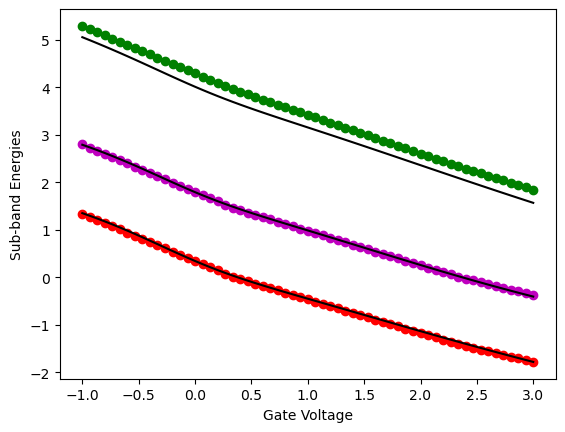

In [19]:
vg_test1=np.ravel(data_test["vg"])
vg_test=vg_test1.reshape(-1,1)
plt.plot(vg_test, e0, 'ro',vg_test, e1, 'mo', vg_test, e2, 'go')
plt.plot(vg_test,10*(y_pred[:,0]), 'k',vg_test,10*(y_pred[:,1]), 'k',vg_test,10*(y_pred[:,2]), 'k')

plt.xlabel('Gate Voltage')
plt.ylabel('Sub-band Energies')
#plt.legend()
plt.show()

In [20]:
#Calculation of Cgg
q = 1.6e-19
mch = 0.05*9.1e-31
hbar = 6.626e-34/(2*3.14);
D=q*mch/(3.14*hbar**2) #2D density of states of channel material
phi_th=0.0259; #thermal voltage
q=1.6e-19; #Electronic charge
Ef=0 #Fermi energy fixed at 0eV
#Load predicted subband energy
E0p=10*np.ravel(y_pred[:,0])
E1p=10*np.ravel(y_pred[:,1])
E2p=10*np.ravel(y_pred[:,2])

In [22]:
#Calculation of Qinv using Fermi-Dirac function
Qinv_pred=q*D*phi_th*(np.log((1+np.exp((Ef-E0p)/phi_th)))+np.log((1+np.exp((Ef-E1p)/phi_th)))+np.log((1+np.exp((Ef-E2p)/phi_th))))
Qinv_actual=q*D*phi_th*(np.log((1+np.exp((Ef-e0)/phi_th)))+np.log((1+np.exp((Ef-e1)/phi_th)))+np.log((1+np.exp((Ef-e2)/phi_th))))
Cgg_actual=np.diff(Qinv_actual)/np.diff(vg_test1)
Cgg_pred=np.diff(Qinv_pred)/np.diff(vg_test1)

In [27]:
#Error metric calculation
#calcularion of R^2 value
actual=Cgg_actual
predicted=Cgg_pred
corr_matrix = np.corrcoef(actual, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)
MSE = (1/len(Cgg_actual))*np.sum((Cgg_actual - Cgg_pred)**2)
print('Mean Squared Error: ',MSE)

rms_err = np.sqrt((1/len(Cgg_actual))*np.sum((Cgg_actual - Cgg_pred)**2))
print('RMS Error is: ',rms_err/1e-6)

0.9830896552866293
Mean Squared Error:  4.599581015921749e-06
RMS Error is:  2144.6633805615625
